<a href="https://colab.research.google.com/github/jaekyoungkim/tensor2ml_NLP/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%99%80_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9C%BC%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC(ch5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# quora questions pairs 문제
# 서비스에 올라온 질문들 중에서 어떤 질문들 서로 유사한지 파악 (영어 데이터만 다룸)
# 쿼라 사용자 월 1억명정도 수많은 질문들이 올라옴
#kaggle연결

# 1. 먼저 본인의 캐글 계정에서 API Token 을 다운받습니다.
# 2. Colab 으로 가서 밑의 코드를 실행시킵니다
#!pip install kaggle
#from google.colab import files
#files.upload()
# https://medium.com/hyunjulie/%EC%BA%90%EA%B8%80%EA%B3%BC-%EA%B5%AC%EA%B8%80-colab-%EC%97%B0%EA%B2%B0%ED%95%B4%EC%A3%BC%EA%B8%B0-6a274f6de81d 참고하기

In [28]:
# 데이터 불러오기
!pip install kaggle

In [29]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 2.3 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=67f62e9275337526bebd684e4e63c2ad78db849e118e81a1770e80a59f4be3df
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [24]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimjaekyoung","key":"3e838f9806be93b88eadf3a7744d40ff"}'}

In [25]:
ls -1ha kaggle.json

kaggle.json


In [32]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list



ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         78           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        115           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        898           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        176           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1879           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13680           False  
house-pr

In [33]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [35]:
!kaggle competitions download -c quora-question-pairs

 96% 297M/309M [00:02<00:00, 130MB/s]
100% 309M/309M [00:02<00:00, 115MB/s]


In [36]:
!ls

quora-question-pairs.zip  sample_data


In [37]:
!unzip quora-question-pairs.zip

Archive:  quora-question-pairs.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [44]:
!unzip train.csv.zip
!upzip test.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               
/bin/bash: upzip: command not found


In [46]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline


In [47]:
DATA_IN_PATH = '/content/'

train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [49]:
print("파일크기")
for file in os.listdir(DATA_IN_PATH):
  if 'csv' in file and 'zip' not in file:
    print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일크기
train.csv                     63.4MB
test.csv                      314.02MB


In [50]:
print("전체 학습 데이터의 개수 : {}".format(len(train_data)))


전체 학습 데이터의 개수 : 404290


In [51]:
train_set = pd.Series(train_data['question1'].tolist()+ train_data['question2'].tolist()).astype(str)

In [60]:
train_set.head()  # q1과 q2 를 연결함 # 각각 40만개 씩이었으니 총 80만개의 질문이 잇엇던 셈

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [61]:
train_set.value_counts()

What are the best ways to lose weight?                                                              161
How can you look at someone's private Instagram account without following them?                     120
How can I lose weight quickly?                                                                      111
What's the easiest way to make money online?                                                         88
Can you see who views your Instagram?                                                                79
                                                                                                   ... 
What is initiation like for the Crips gang?                                                           1
Why is Amway considered a cult?                                                                       1
When is CodeIgniter 3 going to be released?                                                           1
Which rifles will Indian army replace INSAS with? Will they stil

In [56]:
print('교육데이터의 총 질문수: {}'.format(len(np.unique(train_set)))) # 53만개가 유니크 데이터이므로 80-53 = 27만개가 중복된것을 알 수 있음
print('반복해서 나타나는 질문수 : {}'.format(np.sum(train_set.value_counts()>1))) # 27만개 데이터는 11만개의 고유한 질문으로 이루어짐

교육데이터의 총 질문수: 537361
반복해서 나타나는 질문수 : 111873


Text(0.5, 0, 'number of occurrences of questions')

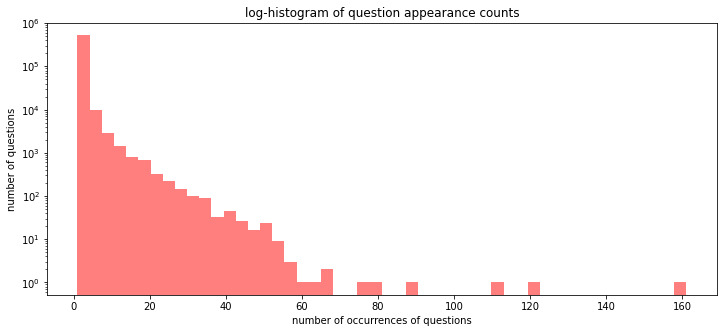

In [59]:
plt.figure(figsize=(12,5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r', label = 'word')
plt.yscale('log', nonposy='clip')
plt.title('log-histogram of question appearance counts')
plt.ylabel('number of questions')
plt.xlabel('number of occurrences of questions')

In [64]:
print("중복 최대 개수: {}".format(np.max(train_set.value_counts())))
print("중복 최소 개수: {}".format(np.min(train_set.value_counts())))
print("중복 평균 개수: {}".format(np.mean(train_set.value_counts())))
print("중복 중간 개수: {}".format(np.median(train_set.value_counts())))


중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50472401234924
중복 중간 개수: 1.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f4da2e77c10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4da2e7a3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4da2e787d0>],
 'means': [<matplotlib.lines.Line2D at 0x7f4da2e78cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4da3a95a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4da2e772d0>,
  <matplotlib.lines.Line2D at 0x7f4da2e774d0>]}

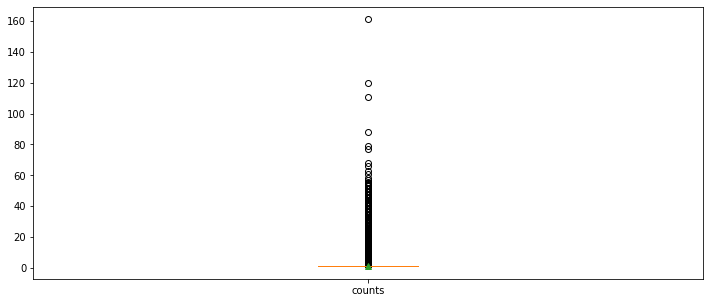

In [66]:
plt.figure(figsize=(12,5))
plt.boxplot([train_set.value_counts()], labels=['counts'], showmeans =True)

(-0.5, 799.5, 599.5, -0.5)

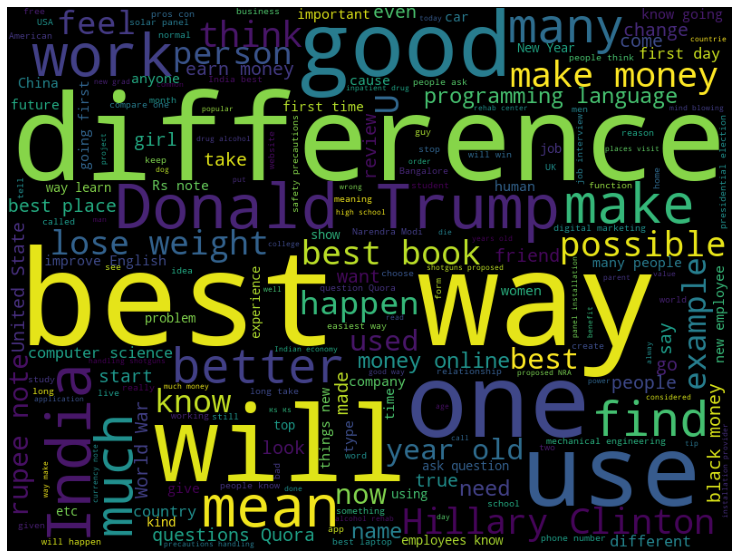

In [67]:
from wordcloud import WordCloud 
cloud = WordCloud(width = 800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize = (15,10))
plt.imshow(cloud)
plt.axis('off')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


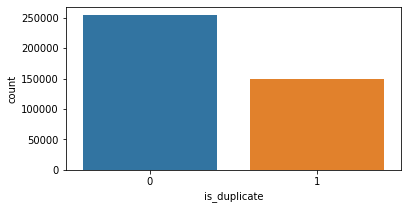

In [68]:
fig , axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['is_duplicate'])


In [71]:
train_length = train_set.apply(len);train_length # 각각의 문장길이를 나타냄

0          66
1          51
2          73
3          50
4          76
         ... 
808575     79
808576     42
808577     17
808578    127
808579     45
Length: 808580, dtype: int64

Text(0, 0.5, 'probability')

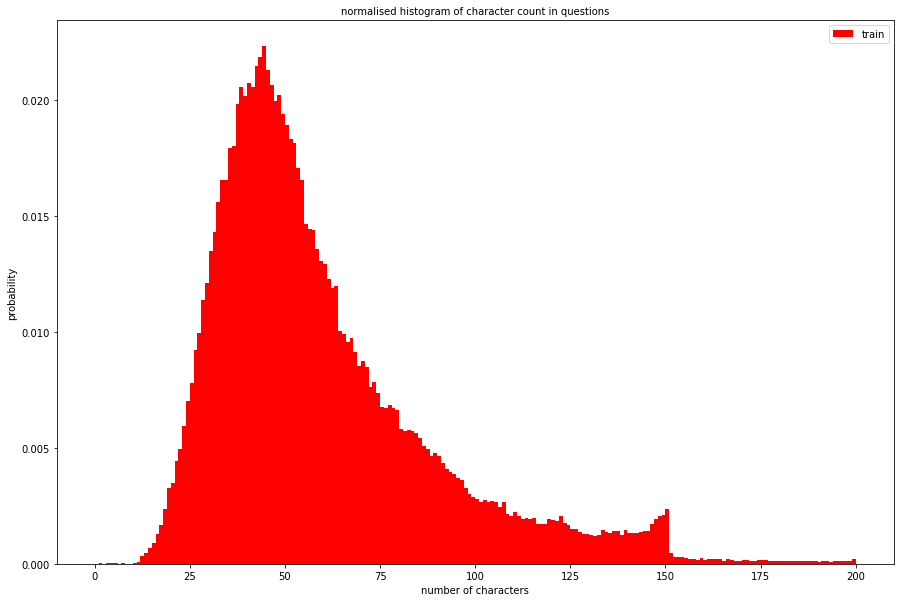

In [76]:
plt.figure(figsize=(15,10))
plt.hist(train_length, bins =200, range = [0,200], facecolor='r',density=True, label='train') # normed 대신 density사용
plt.title('normalised histogram of character count in questions', fontsize= 10)
plt.legend()
plt.xlabel('number of characters')
plt.ylabel('probability')

In [77]:
print('질문 최대길이 :{}'.format(np.max(train_length)))
print('질문 최소길이 :{}'.format(np.min(train_length)))
print('질문 평균길이 :{}'.format(np.mean(train_length)))
print('질문 중간길이 :{}'.format(np.median(train_length)))

질문 최대길이 :1169
질문 최소길이 :1
질문 평균길이 :59.82254817086745
질문 중간길이 :51.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f4da121f890>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4da2ea1ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4da1203210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4da12034d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4da121fc50>,
  <matplotlib.lines.Line2D at 0x7f4da121f850>]}

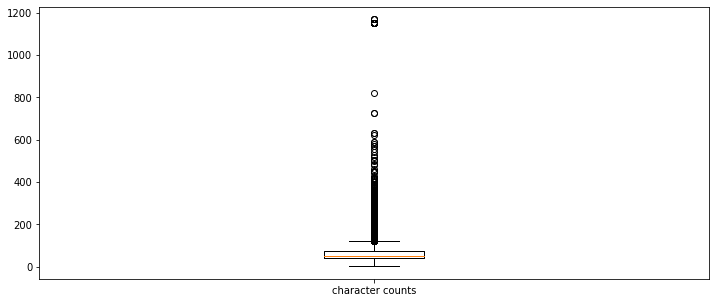

In [78]:
plt.figure(figsize= (12,5))
plt.boxplot(train_length, labels =['character counts'])

In [79]:
# 단어개수를 기준으로 개수 파악하기, 이전에는 문자한글자한글자를 단위로 판단함
train_word_counts= train_set.apply(lambda x :len(x.split(' ')))

In [80]:
train_word_counts

0         14
1          8
2         14
3         11
4         13
          ..
808575    13
808576     9
808577     3
808578    25
808579    10
Length: 808580, dtype: int64

Text(0, 0.5, 'prob')

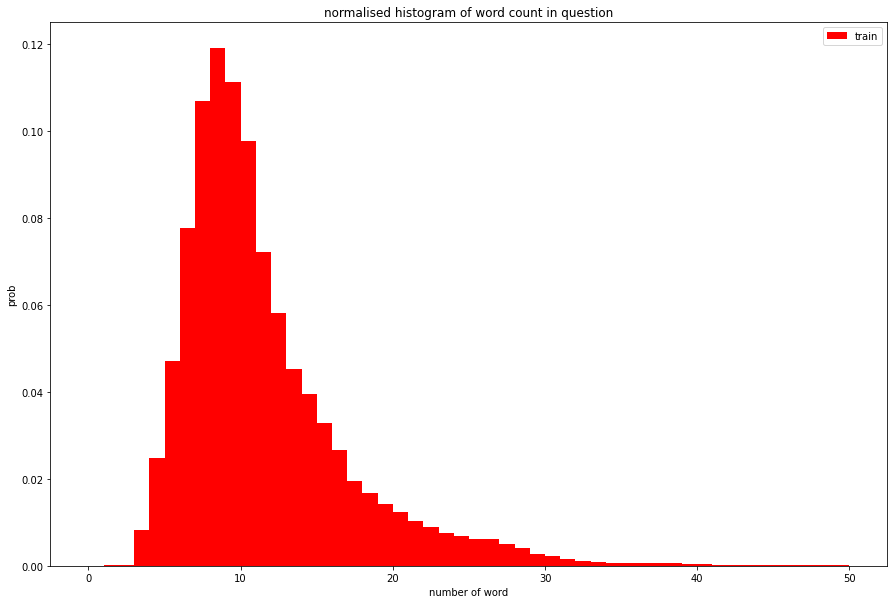

In [81]:
plt.figure(figsize = (15,10))
plt.hist(train_word_counts, bins =50, range =[0,50], facecolor='r', density= True, label = 'train')
plt.title('normalised histogram of word count in question')
plt.legend()
plt.xlabel('number of word')
plt.ylabel('prob')

In [90]:
qmarks = np.mean(train_set.apply(lambda x : "?" in x)) # 물음표가 구두점으로사용됨
math =np.mean(train_set.apply( lambda x : "[math]" in x ))
fullstop = np.mean(train_set.apply( lambda x  : '.' in x))
capital_first = np.mean(train_set.apply( lambda x : x[0].isupper()))
capitals = np.mean(train_set.apply(lambda x : max([y.isupper() for y in x])))
numbers = np.mean(train_set.apply(lambda x : max([y.isdigit() for y in x])))
print(qmarks) # 물음표가 있는 질문
print(math) # 수학 태그가 있는 질문
print(fullstop)  # 구두점. 
print(capital_first) # 첫번째 대문자
print(capitals)  # 대문자 포함
print(numbers) # 숫자가 있는 질문

0.9987385292735412
0.0011736624700091518
0.06308219347498083
0.9981325286304386
0.9995053055974672
0.11827153775755027


In [94]:
# 데이터 전처리
import pandas as pd
import numpy as np
import re
import json
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [96]:
DATA_IN_PATH = '/content/'
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv', encoding= 'utf-8')
train_pos_data = train_data.loc[train_data['is_duplicate'] ==1]
train_neg_data = train_data.loc[train_data['is_duplicate'] ==0]

class_difference = len(train_neg_data) - len(train_pos_data);  class_difference

105764

In [98]:
sample_frac = 1- (class_difference) / len(train_neg_data)  ;sample_frac  # 58% 

0.5852831268846044

In [100]:
train_neg_data = train_neg_data.sample(frac =sample_frac) 

In [102]:
# neg와 pos의 비율을 얼추 맞춤
print("중복질문개수 :{}".format(len(train_pos_data)))
print("중복 아닌 질문개수 :{}".format(len(train_neg_data)))

중복질문개수 :149263
중복 아닌 질문개수 :149263


In [103]:
train_data = pd.concat([train_neg_data, train_pos_data]) ; len(train_data)

298526

In [113]:
# 이렇게 비율을 맞춘 데이터를 가지고 전처리 진행하기


questions1 = [str(s) for s  in train_data['question1']]
questions2 = [str(s) for s  in train_data['question2']]
print(questions1)
print(questions1[1])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [114]:
filtered_questions1 = list()
filtered_questions2 = list()
FILTERS = "([~.,!?\"':;)(])"
change_filter = re.compile(FILTERS) # 패턴 객체 생성. 정규식 표현으로 전처리 하기 위해 설정

for q in questions1:
  filtered_questions1.append(re.sub(change_filter, "",q).lower())

for q in questions2:
  filtered_questions2.append(re.sub(change_filter, "",q).lower())

In [115]:
filtered_questions1

['what do i do if im so nervous and scared of getting my first job because of my social anxiety',
 'an adult who doesnt age gets stuck 2000 years in the past how could he/she survive throughout history to reach today',
 'how do i know the name of the owner of the vehicle by vehicle number',
 'i have an account in the sbi bank can i withdraw the money from different branches across india',
 'i want to buy a sony alpha a7ii camera but the price so much high so its good to purchase the camera from another country like dubai',
 'how can i become a happier person',
 'what are some negative personality traits that could actually help one be a mathematician or theoretical physicist',
 'can i mix water with milk',
 'why doesnt snapchat allow you to play music from ios via bluetooth while recording a video in the app',
 'what universities does century bank recruit new grads from what majors are they looking for',
 'who is ratan tata',
 'why do people think that girls cant be as good in mathemat

In [116]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_questions1 + filtered_questions2)

In [119]:
questions1_sequence = tokenizer.texts_to_sequences(filtered_questions1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_questions2)

In [124]:
MAX

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [125]:
MAX_SEQUENCE_LENGTH =31
q1_data =pad_sequences(questions1_sequence, maxlen = MAX_SEQUENCE_LENGTH, padding='post')
q2_data =pad_sequences(questions2_sequence, maxlen = MAX_SEQUENCE_LENGTH, padding='post')

In [126]:
q1_data

array([[   2,    9,    5, ...,    0,    0,    0],
       [  33, 1454,   38, ...,    0,    0,    0],
       [   4,    9,    5, ...,    0,    0,    0],
       ...,
       [   4,   21,    7, ...,    0,    0,    0],
       [   2,   21, 7931, ...,    0,    0,    0],
       [   9,   15,  311, ...,    0,    0,    0]], dtype=int32)

In [127]:
q1_data.shape

(298526, 31)

In [129]:
word_vocab={}
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0
word_vocab

{'the': 1,
 'what': 2,
 'is': 3,
 'how': 4,
 'i': 5,
 'to': 6,
 'a': 7,
 'in': 8,
 'do': 9,
 'of': 10,
 'are': 11,
 'and': 12,
 'can': 13,
 'for': 14,
 'you': 15,
 'why': 16,
 'best': 17,
 'my': 18,
 'it': 19,
 'on': 20,
 'does': 21,
 'which': 22,
 'be': 23,
 'if': 24,
 'some': 25,
 'or': 26,
 'get': 27,
 'that': 28,
 'have': 29,
 'should': 30,
 'with': 31,
 'your': 32,
 'an': 33,
 'from': 34,
 'india': 35,
 'will': 36,
 'people': 37,
 'who': 38,
 'when': 39,
 'like': 40,
 'good': 41,
 'would': 42,
 'there': 43,
 'at': 44,
 'as': 45,
 'quora': 46,
 'about': 47,
 'between': 48,
 'most': 49,
 'one': 50,
 'not': 51,
 'way': 52,
 'we': 53,
 'make': 54,
 'did': 55,
 'life': 56,
 'by': 57,
 'where': 58,
 'was': 59,
 'money': 60,
 'any': 61,
 'so': 62,
 'time': 63,
 'me': 64,
 'after': 65,
 'learn': 66,
 'know': 67,
 'this': 68,
 'they': 69,
 'has': 70,
 'difference': 71,
 'whats': 72,
 'new': 73,
 'think': 74,
 'trump': 75,
 'use': 76,
 'much': 77,
 'am': 78,
 'ever': 79,
 'indian': 80,
 'al

In [132]:
labels = np.array(train_data['is_duplicate'], dtype = int) ; labels.shape

(298526,)

In [134]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) ; 
print(len(word_vocab))

76171


In [136]:
# 저장 옵션 설정하기
TRAIN_Q1_DATA = 'q1_train.npy'
TRAIN_Q2_DATA = 'q2_train.npy'
TRAIN_LABEL_DATA = 'label_train.npy'
DATA_CONFIGS = 'data_configs.npy'

np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA , 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA , 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA , 'wb'), labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))
# 질문과 라벨 데이터를 저장
# 딕셔너리 형태의 데이터 정보는 json파일로 저장함
# 전처리 완료!!

In [149]:
# 평가데이터에 대해서도 앞의 전처리 
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding= 'utf-8')
print(test_data.head())
print(test_data.shape)

   test_id  ...                                          question2
0        0  ...  Why did Microsoft choose core m3 and not core ...
1        1  ...        How much cost does hair transplant require?
2        2  ...                      What you send money to China?
3        3  ...                                  What foods fibre?
4        4  ...                     How their can I start reading?

[5 rows x 3 columns]
(2345796, 3)


In [140]:
test_data.test_id

0                0
1                1
2                2
3                3
4                4
            ...   
2345791    2345791
2345792    2345792
2345793    2345793
2345794    2345794
2345795    2345795
Name: test_id, Length: 2345796, dtype: int64

In [145]:
valid_ids = [type(x) == int  for x in test_data.test_id] ; print(valid_ids)
test_data = test_data[valid_ids].drop_duplicates()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [147]:
test_data.shape

(2345796, 3)

In [153]:
test_questions1 = [str(s) for s in test_data['question1']]
test_questions2 = [str(s) for s in test_data['question2']]

filtered_test_questions1 = list()
filtered_test_questions2 = list()

for q in test_questions1 :
  filtered_test_questions1.append(re.sub(change_filter, "", q).lower())

for q in test_questions2 :
  filtered_test_questions2.append(re.sub(change_filter, "", q).lower())  

In [155]:
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_questions1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_questions2)

test_q1_data = pad_sequences(test_questions1_sequence, maxlen = MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_questions2_sequence, maxlen = MAX_SEQUENCE_LENGTH, padding='post')

In [156]:
test_id = np.array(test_data['test_id']) ; test_id

array([      0,       1,       2, ..., 2345793, 2345794, 2345795])

In [157]:
print(test_q1_data.shape)
print(test_q2_data.shape)
print(test_id.shape)


(2345796, 31)
(2345796, 31)
(2345796,)


In [158]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA, 'wb'), test_q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)


In [159]:
# 모델링 : 총 3개의 모델링 할예정 (xg boost, malstm, CNN)
# 1. XG 부스트 : 앙상블 모델 중 하나, 부스팅 기법을 사용하는 방법 , 트리 부스팅을 활용한 모델
#                 트리 부스팅 방식에 경사 하강법을 통해 최적화하는 방법, 연산량을 줄이기 위해 의사결정 트리를 구성할때 병렬처리를 사용해 빠른 시간에 학습이 가능
# 배깅 : 여러개의 학습 알고리즘, 모델을 통해 각각 결과를 예측하고 모든 결과를 동등하게 보고 취합해서 결과를 얻는 방싱, RF도 배깅의 한예임. PARALLEL
# 부스팅 : 각 결과를 순차적으로 취합하는데, 단순히 하나씩 취합하는 방법이 아니라 이전 알고리즘, 모델이 학습 후 잘못 예측한 부분에 가중치를 줘서 다시 모델로 가서 학습하는 방식 SEQUENTIAL
# 싱글 : CNN, RNN뜽




In [162]:
import numpy as np
DATA_IN_PATH = '/content/'
TRAIN_Q1_DATA = 'q1_train.npy'
TRAIN_Q2_DATA = 'q2_train.npy'
TRAIN_LABEL_DATA_FILE = 'label_train.npy'

train_q1_data = np.load(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'rb'))
train_q2_data = np.load(open(DATA_IN_PATH + TRAIN_Q2_DATA, 'rb'))
train_labels = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA_FILE, 'rb'))


In [165]:
train_input = np.stack((train_q1_data, train_q2_data), axis=1)
# stack 두질문을 하나의 쌍으로 만들기,
print(train_input.shape) # 29만개 데이터, 2개의 질문 각각 길이가 31
print(train_input)

(298526, 2, 31)
[[[   2    9    5 ...    0    0    0]
  [   5 2446   29 ...    0    0    0]]

 [[  33 1454   38 ...    0    0    0]
  [   4    9    5 ...    0    0    0]]

 [[   4    9    5 ...    0    0    0]
  [   2    3    1 ...    0    0    0]]

 ...

 [[   4   21    7 ...    0    0    0]
  [   4   11  135 ...    0    0    0]]

 [[   2   21 7931 ...    0    0    0]
  [   2   21 7931 ...    0    0    0]]

 [[   9   15  311 ...    0    0    0]
  [   3   19  249 ...    0    0    0]]]


In [166]:
from sklearn.model_selection import train_test_split
train_input, eval_input, train_label, eval_label = train_test_split(train_input, train_labels, test_size= 0.2, random_state =4242)

In [170]:
import xgboost as xgb
train_data = xgb.DMatrix(train_input.sum(axis=1), label =train_label)
eval_data = xgb.DMatrix(eval_input.sum(axis=1), label= eval_label)
# xgb라이버리리의 데이터 형식이 dmatrix형태로 만들어야함
# 적용과정에서 sum함수를 사용
# 각데이터의 두 질문을 하나의 값으로 만들어 주기 위해서임
# 두개의 데이터를 묶어서
#하나의 리스트로 만든다
data_list = [(train_data , 'train'), (eval_data, 'valid')]


In [171]:
data_list

[(<xgboost.core.DMatrix at 0x7f4c6e41bd50>, 'train'),
 (<xgboost.core.DMatrix at 0x7f4c6e41b350>, 'valid')]

In [172]:
params={}
params['objective'] ='binary:logistic'  #목적함수
params['eval_metric'] = 'rmse' # 평가지표  root mean square error

In [173]:
bst = xgb.train(params, train_data, num_boost_round=1000, evals=data_list, early_stopping_rounds=10)  # epochs 1000, 조기멈춤 10

[0]	train-rmse:0.483672	valid-rmse:0.484319
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[1]	train-rmse:0.47349	valid-rmse:0.474528
[2]	train-rmse:0.466694	valid-rmse:0.468082
[3]	train-rmse:0.462016	valid-rmse:0.46378
[4]	train-rmse:0.457894	valid-rmse:0.459979
[5]	train-rmse:0.455313	valid-rmse:0.45764
[6]	train-rmse:0.453077	valid-rmse:0.455611
[7]	train-rmse:0.451452	valid-rmse:0.454219
[8]	train-rmse:0.449662	valid-rmse:0.452662
[9]	train-rmse:0.448382	valid-rmse:0.451494
[10]	train-rmse:0.447468	valid-rmse:0.450645
[11]	train-rmse:0.446291	valid-rmse:0.449658
[12]	train-rmse:0.443799	valid-rmse:0.447324
[13]	train-rmse:0.443225	valid-rmse:0.446876
[14]	train-rmse:0.442069	valid-rmse:0.445873
[15]	train-rmse:0.441639	valid-rmse:0.445531
[16]	train-rmse:0.441182	valid-rmse:0.445203
[17]	train-rmse:0.440396	valid-rmse:0.444512
[18]	train-rmse:0.439899	valid-rmse:0.444215
[19]	train-rm

In [174]:
TEST_Q1_DATA_FILE = 'test_q1.npy'
TEST_Q2_DATA_FILE = 'test_q2.npy'
TEST_ID_DATA_FILE = 'test_id.npy'

test_q1_data = np.load(open(DATA_IN_PATH + TEST_Q1_DATA_FILE, 'rb'))
test_q2_data = np.load(open(DATA_IN_PATH + TEST_Q2_DATA_FILE, 'rb'))
test_id_data = np.load(open(DATA_IN_PATH + TEST_ID_DATA_FILE, 'rb'))

In [175]:
test_input = np.stack((test_q1_data, test_q2_data), axis=1)
test_data =xgb.DMatrix(test_input.sum(axis=1))
test_predict = bst.predict(test_data)


In [177]:
DATA_OUT_PATH ='/content/OUT'
if not os.path.exists(DATA_OUT_PATH):
  os.makedirs(DATA_OUT_PATH)


In [180]:
output = pd.DataFrame('test_id':test_id_data, 'is_duplicate':test_predict)
output.to_csv(DATA_OUT_PATH + 'simple_xgb.csv', index=False)

SyntaxError: ignored